<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import inv

#**1.3 Linear Regression**
Linear regression is used frequently in practical applications because of its simplicity. The models depend linearly on their unknown parameters and therefore are easier to fit that models which are non-linearly related to their parameters. As a result, the statistical properties of the resulting estimators are easier to determine.

##**1.3.1 QR Decomposition**
QR decomposition is a useful procedure to solve the linear least squares problem. First we use the Gram-Schmidt algorithm (from 1.2.3) to obtain an orthonormal basis span(**a$_{1}$**,...,**a$_{m}$**) from a linearly independent set of span(**a$_{1}$**,...,**a$_{m}$**) . In order to derive QR decomposition, let
\begin{align}
 A = \begin{pmatrix}
        ⃒ & \ & ⃒   \\
        \mathbf{a_{1}} &... & \mathbf{a_{m}} \\
         ⃒ & \ & ⃒  
        \end{pmatrix}
\end{align}
\begin{align}
\text{and}
\end{align}
\begin{align}
         Q = \begin{pmatrix}
        ⃒ & \ & ⃒   \\
        \mathbf{q_{1}} &... & \mathbf{q_{m}} \\
         ⃒ & \ & ⃒  
        \end{pmatrix}.
\end{align}
where *A*, *Q* are *n*  𝖷 *m* matrices. The output of the Gram-Schimdt algorithm above can then be written in the following compact form, known as QR decomposition in Figure 1.3.
\begin{align}
A = QR
\end{align}
where column *i* of the *m* 𝖷 *m* matrix *R* contains the coefficients of the linear combination of **q$_{j}$**'s that produces **a$_{i}$**. *Q* is a ℝ$^{n 𝚡 m}$ matrix with *Q$^{T}$Q* = *I$_{m𝚡 m}$*. It may be easier to verify *A* =*QR* by
\begin{align}
A^{T} = R^{T}Q^{T}
\end{align}

By the proof of Gram-Schmidt, **a$_{i}$** ∈ span(**q$_{1}$,...,q$_{i}$**). So columni *i* of *R* has only zeros below the diagonal. Hence *R* has a special structure: it is upper triangular.

\begin{align}
      \begin{bmatrix}
       | & | & & & | \\
       | & | & & & | \\
       a_{1} & a_{2} & □ & □ & a_{n} \\
       | & | & & & | \\
       | & | & & & | \\
        \end{bmatrix}
        =
        \begin{bmatrix}
       | & | & & & | \\
       | & | & & & | \\
       q_{1} & q_{2} & □ & □ & q_{n} \\
       | & | & & & | \\
       | & | & & & | \\
        \end{bmatrix}
        \begin{bmatrix}
       r & 𝖷 & 𝖷  & 𝖷 & 𝖷  \\
         & r & 𝖷 & 𝖷  & 𝖷  \\
         &   & □ & 𝖷  & 𝖷  \\
         &   &     &  □ &  𝖷 \\
        &    &     &       & r \\
        \end{bmatrix}
\end{align}
\begin{align}
        \text{Fig. 1.3: QR decomposition}
\end{align}

In [ ]:
#Gram Schmidt Algorithm
def gram_schmidt(V):
    U = np.zeros(V.shape)
    for i in range(V.shape[1]):
        # orthogonalization
        vector = V[:, i] ## holds the sepcified i vector
        space = U[:, :i] ## holds all the vectors up to the specified i variable
        projection = vector @ space
        vector = vector - np.sum(projection * space, axis=1)
        # normalization
        norm = np.sqrt(vector @ vector)
        vector /=round(abs(norm),ndigits=0)  < 1e-8 and 1 or norm
        U[:, i] = vector
    return U

In [ ]:
A = np.array([[1,1,0],[1,0,1],[0,1,1]], dtype=float)
print("matrix A")
print(A)
Q = gram_schmidt(A) ## Find matrix Q using the gram-schmidt algorithm
print('Q is', Q)
R = Q.T @ A ## Find matrix R using Q^T*A
print('R is', R)
QR = Q@R
print('QR is ', QR)


matrix A
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
Q is [[ 0.70710678  0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [ 0.          0.81649658  0.57735027]]
R is [[ 1.41421356e+00  7.07106781e-01  7.07106781e-01]
 [ 1.66533454e-16  1.22474487e+00  4.08248290e-01]
 [ 2.22044605e-16 -1.11022302e-16  1.15470054e+00]]
QR is  [[ 1.00000000e+00  1.00000000e+00  4.02426802e-17]
 [ 1.00000000e+00 -2.45223988e-16  1.00000000e+00]
 [ 2.64171508e-16  1.00000000e+00  1.00000000e+00]]


##**1.3.2 Least-squares Problems**
Let *A* ∈ ℝ$^{n𝖷m}$ be an *n 𝖷 m* matrix and **b** ∈ ℝ$^{n}$ be a vector. We try to solve the system *A* **x** = **b**, which is often inconsistent. We are looking to use the A**x** to approximate **b**. It is reasonable to assume that matrix *A* has linearly independent columns. If *n* = *m*, that is, if *A* is a square matrix, we can use the matrix inverse to solve the system. But we are particularly interested in the over-determined case where *n* > *m*. We cannot use the matrix inverse then. One possibility to make sense of the problem in that case is to cast it as the least-square problem.

\begin{align}
\min_{x∈ℝ^{m}} ||A\mathbf{x}-\mathbf{b}||
\end{align}

In order to use the orthogonal decomposition result, we write
\begin{align}
 A = \begin{pmatrix}
        ⃒ & \ & ⃒   \\
        \mathbf{a_{1}} &... & \mathbf{a_{m}} \\
         ⃒ & \ & ⃒  
        \end{pmatrix} =
        \begin{pmatrix}
        a_{1,1} & ... & a_{1,m}   \\
        a_{2,1} &... & a_{2,m} \\
        ... & ... & ... \\
        a_{n,1} & ... & a_{n,m}  
        \end{pmatrix}
\text{and }
\mathbf{b} = \begin{pmatrix}
b_{1} \\ : \\ b_{n}
\end{pmatrix}
\end{align}

Now we seek a linear combination of the columns of *A* that minimizes the objectives
\begin{align}
||\sum_{j=1}^{n}x_j\mathbf{a_j}-\mathbf{b}||^2 = \sum_{j=1}^{n} \left(\sum_{j=1}^{m}x_{j}a_{i,j}-b_i\right)^2 = \sum_{j=1}^{n}(\hat{y_{i}}-b_i)^2.
\end{align}

where
\begin{align}
\hat{y_{i}} = \sum_{j=1}^{m}x_{j}a_{i,j}.
\end{align}

Now apply our characterization of the orthogonal projection on the column space of *A*. Let
\begin{align}
\hat{\mathbf{b}}= 𝒫_{col(A)}\mathbf{b}.
\end{align}

Because $\hat{\mathbf{b}}$ is in the column space of *A*, the equation *A* **x** = $\hat{\mathbf{b}}$ is consistent and there is an$\hat{x}$ such that
\begin{align}
A\hat{\mathbf{x}} = \hat{\mathbf{b}}.(1.3.1)
\end{align}

Since $\hat{\mathbf{b}}$ is the closed point in col(A) to **b**, a vector $\hat{\mathbf{x}}$ is a least-square solution of *A* **x** = **b** if and only if (1.3.1) holds. The following theorem provides an alternative description of the solution.

**Theorem 1.3.1 (Normal Equations)** Let *A* ∈ ℝ$^{n𝖷m}$ be an *n* 𝖷 *m* matrix with linearly independent columns and let **b** ∈ℝ$^{n}$ be a vector. The solution to the least square problem
\begin{align}
\min_{x∈ℝ^{m}} ||A\mathbf{x}-\mathbf{b}||
\end{align}
satisfies
\begin{align}
A^{T}A\mathbf{x}=A^{T}\mathbf{b}
\end{align}
which are known as the normal equations.


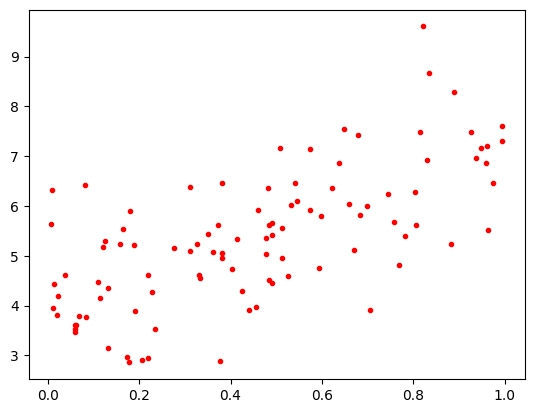

In [ ]:
## generate random data
def generate_data():
    A = np.random.rand(100,1) # gives us 100 random values but formated as a 1D array
    b = 4 + 3*A + np.random.randn(100,1)
    return A, b

# Define the Normal Equation (A^T*A)^-1*A^Tb
def normalEquation(A,b):
    AT = A.T # A transpose
    NE = inv(AT.dot(A)).dot(AT).dot(b)
    return NE # returns normal equation

# Plot the generated data
A,b = generate_data()
import matplotlib.pyplot as plt
plt.plot(A,b, "r.")


In [ ]:
A_b = np.c_[np.ones((100, 1)), A]
params = normalEquation(A_b,b)
print(params)

[[3.95134131]
 [3.14712977]]


**Theorem 1.3.2 (Least Squares via QR)** Let *A* ∈ ℝ$^{n𝖷m}$ be an *n* 𝖷 *m* matrix with linearly independent columns, let **b** ∈ ℝ$^{n}$ be a vector, and let *A* = *QR* be a QR decomposition of *A*, where *Q* is a ℝ$^{n𝖷m}$ matrix with *Q$^{T}$Q* = *I$_{m𝖷m}$* and *R* is upper triangular. The solution to the least-squares problem
\begin{align}
\min_{x∈ℝ^{m}} ||A\mathbf{x}-\mathbf{b}||
\end{align}
satisfies
\begin{align}
R \mathbf{x}^* = Q^{T} \mathbf{b}
\end{align}

In [ ]:
test_A = np.array([[0],[2]])
test_A_b = np.c_[np.ones((2,1)), test_A]
prediction = test_A_b.dot(params)
print(prediction)

[[ 3.95134131]
 [10.24560084]]


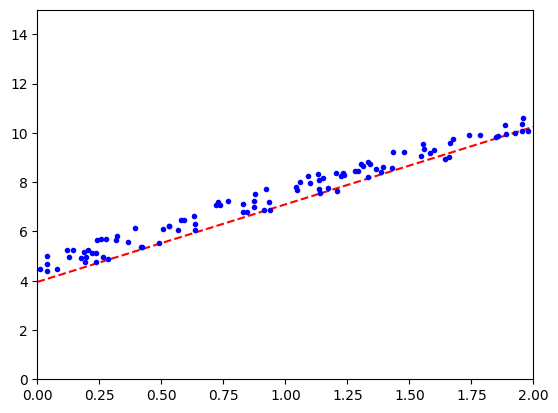

In [ ]:
plt.plot(test_A, prediction, "r--")
plt.plot(A, b, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

##**1.3.3 Linear Regression**
Given input data points {(**x$_{i}$**,*y$_{i}$*)}$_{i=1}^n$ with each **x$_{i}$** = (*x$_{i1}$,...,*x$_{id}$)$^{T}$, we seek an affine function to fit the data. The common approach involves finding coefficients, β$_{j}$'s that minimize the criterion
\begin{align}
\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2
\end{align}
where
\begin{align}
\hat{y}_{i} = β_{0} + \sum_{j=1}^{d}β_{j}x_{ij}
\end{align}
can be viewed as the predicted values of the linear model with coefficients β$_{j}$. The minimization problem can be formulated in matrix form. Let
\begin{align}
y = \begin{pmatrix}
       y_1 \\
       y_2 \\
       \text{:} \\
       y_n
        \end{pmatrix},
A = \begin{pmatrix}
      1 & \mathbf{x}_1^T \\
      1 & \mathbf{x}_2^T \\
      \text{:} & \text{:} \\
      1 & 1 \mathbf{x}_n^T
    \end{pmatrix},
β = \begin{pmatrix}
      β_{0} \\
      β_{1} \\
      \text{:} \\
      β_{d}
    \end{pmatrix}.
\end{align}

Then the problem is transformed to
\begin{align}
\min_{β} ||\mathbf{y} - Aβ||^2.
\end{align}


In [ ]:
import pandas as pd
# Generate random data
np.random.seed(0)
A = 2 * np.random.rand(100) # gives us 100 random values
extra = np.random.rand(100)
b = 4 + 3*A + extra

# Create a data frame to store the Correlating A nd b values
df = pd.DataFrame(
        {'A' : A,
         'b' : b}
  )

# Show the first 5 row
df.head()

,A,b
0,1.097627,7.970698
1,1.430379,8.561144
2,1.205527,8.351774
3,1.089766,8.231488
4,0.847310,6.790682


In [ ]:
# Calculate the mean
mean_A = np.mean(A)
mean_b = np.mean(b)

# Calculate the numerator and denominator of beta
df['Abcov'] = (df['A']-mean_A) * (df['b'] - mean_A) ## S_xy
df['Avar'] = (df['A']-mean_A)**2 ## S_xx
# Calculate beta0 and beta1
beta = df['Abcov'].sum() / df['Avar'].sum() ## S_xy/S_xx
alpha = mean_b - (beta* mean_A)
print('alpha = ',alpha)
print('beta  = ', beta)

alpha =  4.558080024157021
beta  =  2.968275530101883


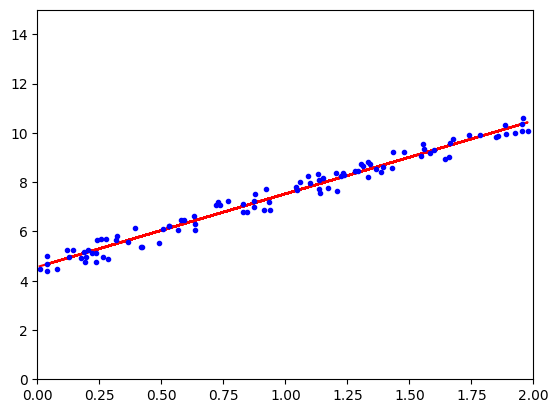

In [ ]:
# Get a prediction formula
yhat = alpha + beta*A

# Plot the data with the fitted line
plt.plot(A, yhat, "r-")
plt.plot(A, b, "b.")
plt.axis([0, 2, 0 , 15])
plt.show()